In [1]:
# импорт необходимых библиотек
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pymystem3 import Mystem
from wordcloud import WordCloud
from stop_words import get_stop_words

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# вывод данных по документам
sample = pd.read_csv('../data/train/sample.csv')
sample.head()

class                                               text
0  arrangement  СОГЛАШЕНИЕ N 8\nо расторжении трудового догово...
1  arrangement  Соглашение о предоставлении опциона на заключе...
2  arrangement  Соглашение\nо реструктуризации задолженности\n...
3  arrangement  Дополнительное соглашение\r\nк договору купли-...
4  arrangement  Соглашение\nо расторжении договора об оказании...

In [3]:
# сведения по данным
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   501 non-null    object
 1   text    501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [4]:
# проверка на наличие пропусков
sample.isnull().sum()

class    0
text     0
dtype: int64

Пропусков **НЕТ**

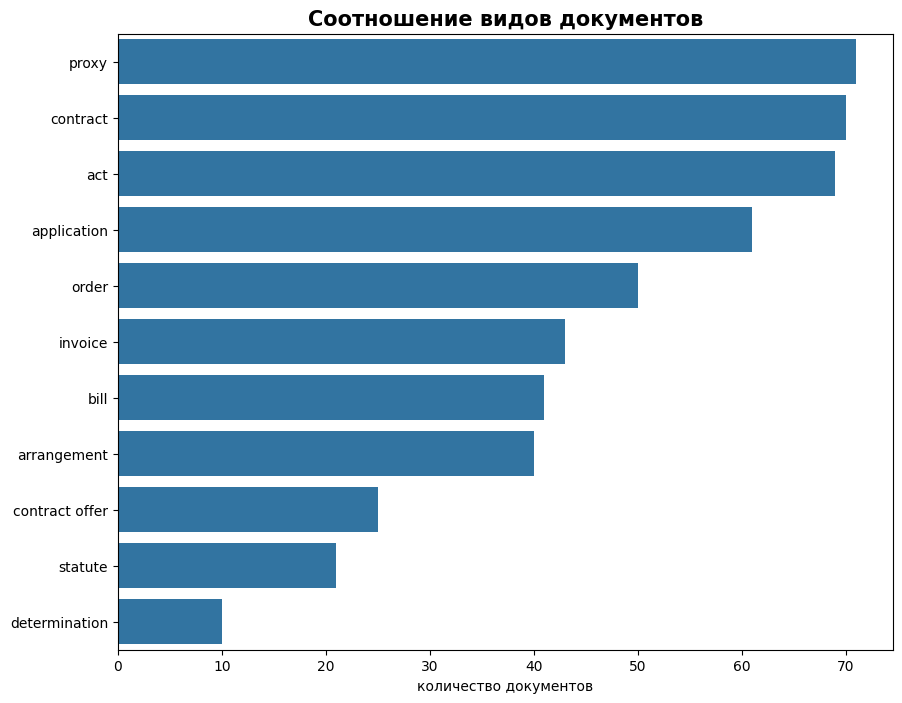

In [5]:
# визуализация соотнощения видов документов
plt.figure(figsize=(10,8))
sns.countplot(y = "class" , order=sample["class"].value_counts().index, data = sample) \
.set_title("Соотношение видов документов", fontweight="bold", fontsize=15)
plt.xlabel("количество документов", fontsize=10)
plt.ylabel("")
plt.show()

In [6]:
# количество классов
sample['class'].nunique()

11

In [7]:
# метки классов
labels = sample['class'].unique().tolist()
labels

['arrangement',
 'application',
 'proxy',
 'contract',
 'act',
 'order',
 'determination',
 'statute',
 'contract offer',
 'invoice',
 'bill']

In [8]:
# преобразование в словарь
labels = {key:val for key,val in enumerate(labels)}
labels

{0: 'arrangement',
 1: 'application',
 2: 'proxy',
 3: 'contract',
 4: 'act',
 5: 'order',
 6: 'determination',
 7: 'statute',
 8: 'contract offer',
 9: 'invoice',
 10: 'bill'}

In [9]:
# сохранение в файл формата json
with open("labels.json", "w") as outfile: 
    json.dump(labels, outfile)

# Анализ содержания текстов документов

In [10]:
# инициализация элемента класса Mystem() для последующей лемматизации текста на русском языке
m = Mystem() 

In [11]:
# функция для лемматизации текста
def lemmatize(text):
    
    return [i for i in m.lemmatize(text) if len(i.strip()) > 0]

In [12]:
%%time
# формирование столбца 'text' - текстового содержания документа в нижнем регистре
sample["text"] = sample["text"].apply(lambda x: x.lower())
# в тексте документа оставляем только кириллицу
sample["text"] = sample["text"].apply(lambda x: re.sub("[^а-яА-ЯёЁ]", " ", x)) 
# лемматизируем текст документа из столбца 'text' и формируем столбец 'lemm_text_list' - список лемматизированных слов документа
sample["lemm_text_list"] = sample["text"].apply(lemmatize)
# формируем столбец 'lemm_text' - лемматизированный тест договора
sample["lemm_text"] = sample["lemm_text_list"].apply(lambda x: ' '.join(x))

CPU times: total: 1.81 s
Wall time: 7min 8s


In [13]:
# преобразование содержания лемматизированных текстов документа в единую строку
text = " ".join(list(sample["lemm_text"].values))

In [56]:
# задания параметров облака слов

STOPWORDS_RU = get_stop_words("russian")

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=42,
    background_color="white",
    repeat=True,
    collocations=False,
    stopwords=STOPWORDS_RU,
)

In [57]:
# функция визуализации облака слов
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [58]:
# формирование облака слов
wordcloud_all = wordcloud.generate(text)

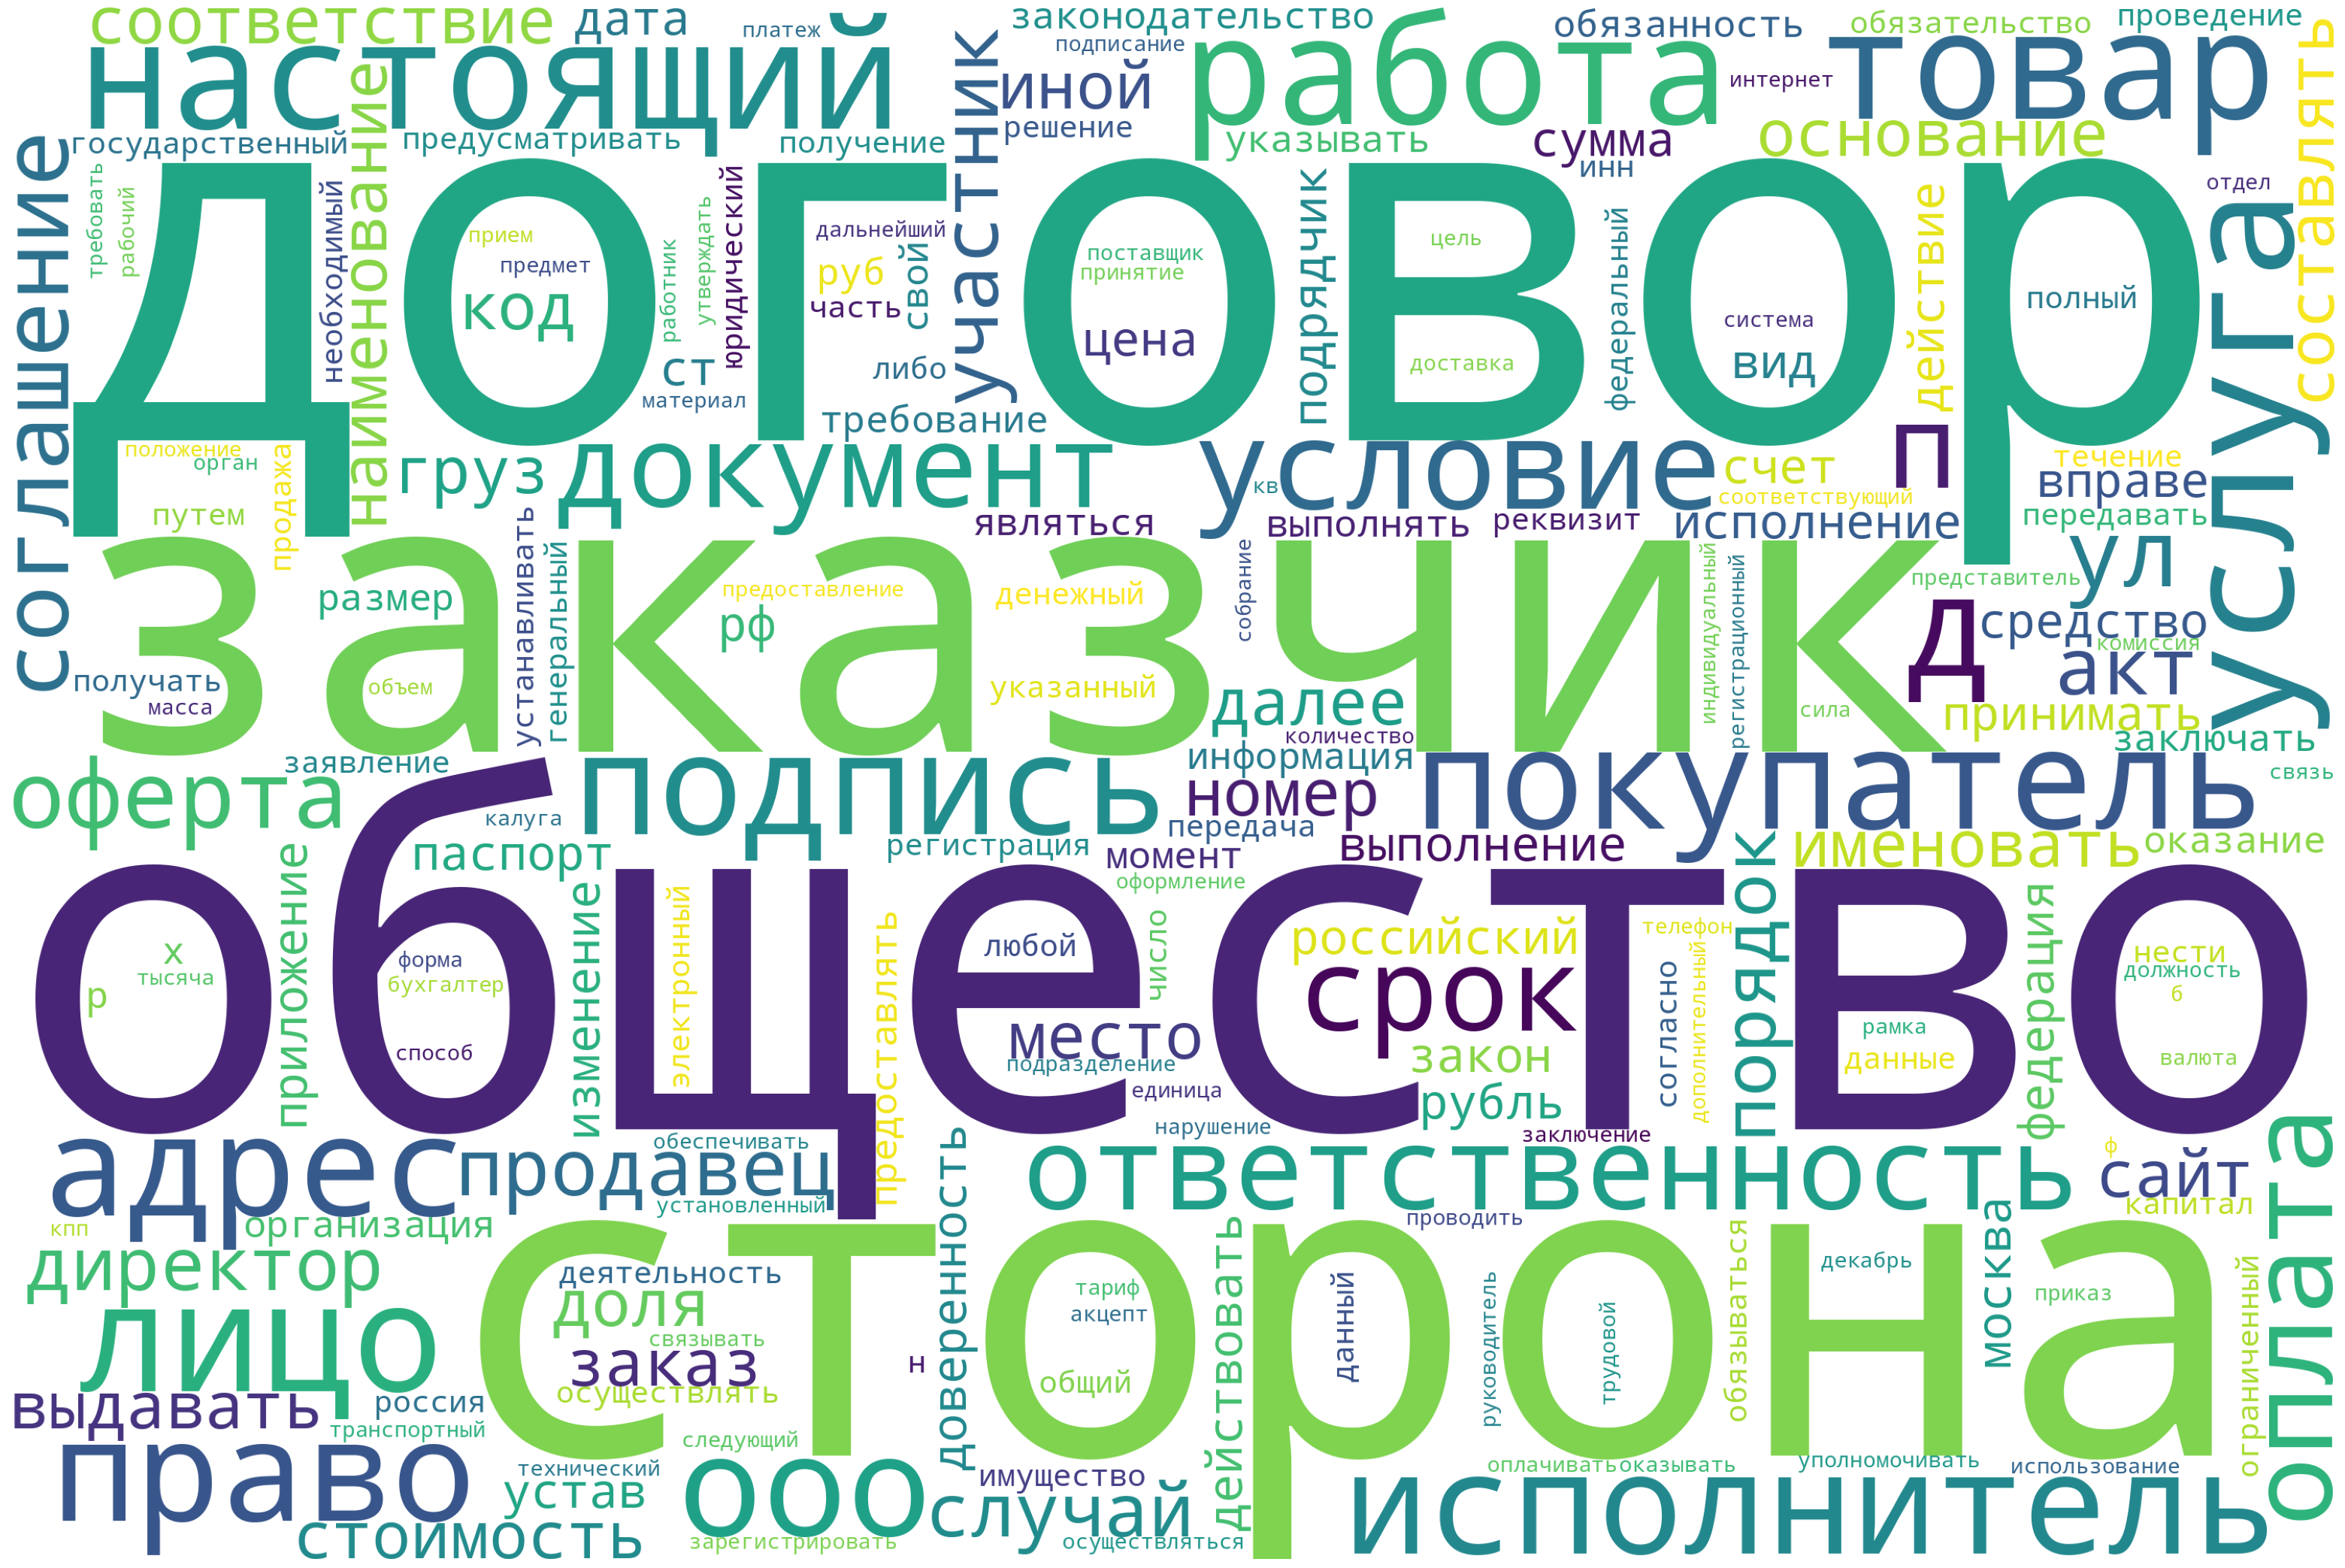

In [59]:
# визуализация сформированного облака слов
plot_cloud(wordcloud_all)

In [14]:
labels

{0: 'arrangement',
 1: 'application',
 2: 'proxy',
 3: 'contract',
 4: 'act',
 5: 'order',
 6: 'determination',
 7: 'statute',
 8: 'contract offer',
 9: 'invoice',
 10: 'bill'}

Общий маппинг классов:

* proxy - доверенность
* contract - договор
* act - акт
* application - заявление
* order - приказ
* invoice - счет
* bill - приложение
* arrangement - соглашение
* contract offer - договор оферты
* statute - устав
* determination - решение

In [78]:
# выборка arrangement
arrangement_text = ' '.join(list(sample[sample['class'] == 'arrangement']['lemm_text'].apply(lambda x: x.lower()).values))

In [80]:
# формирование облака слов
wordcloud_arrangement = wordcloud.generate(arrangement_text)

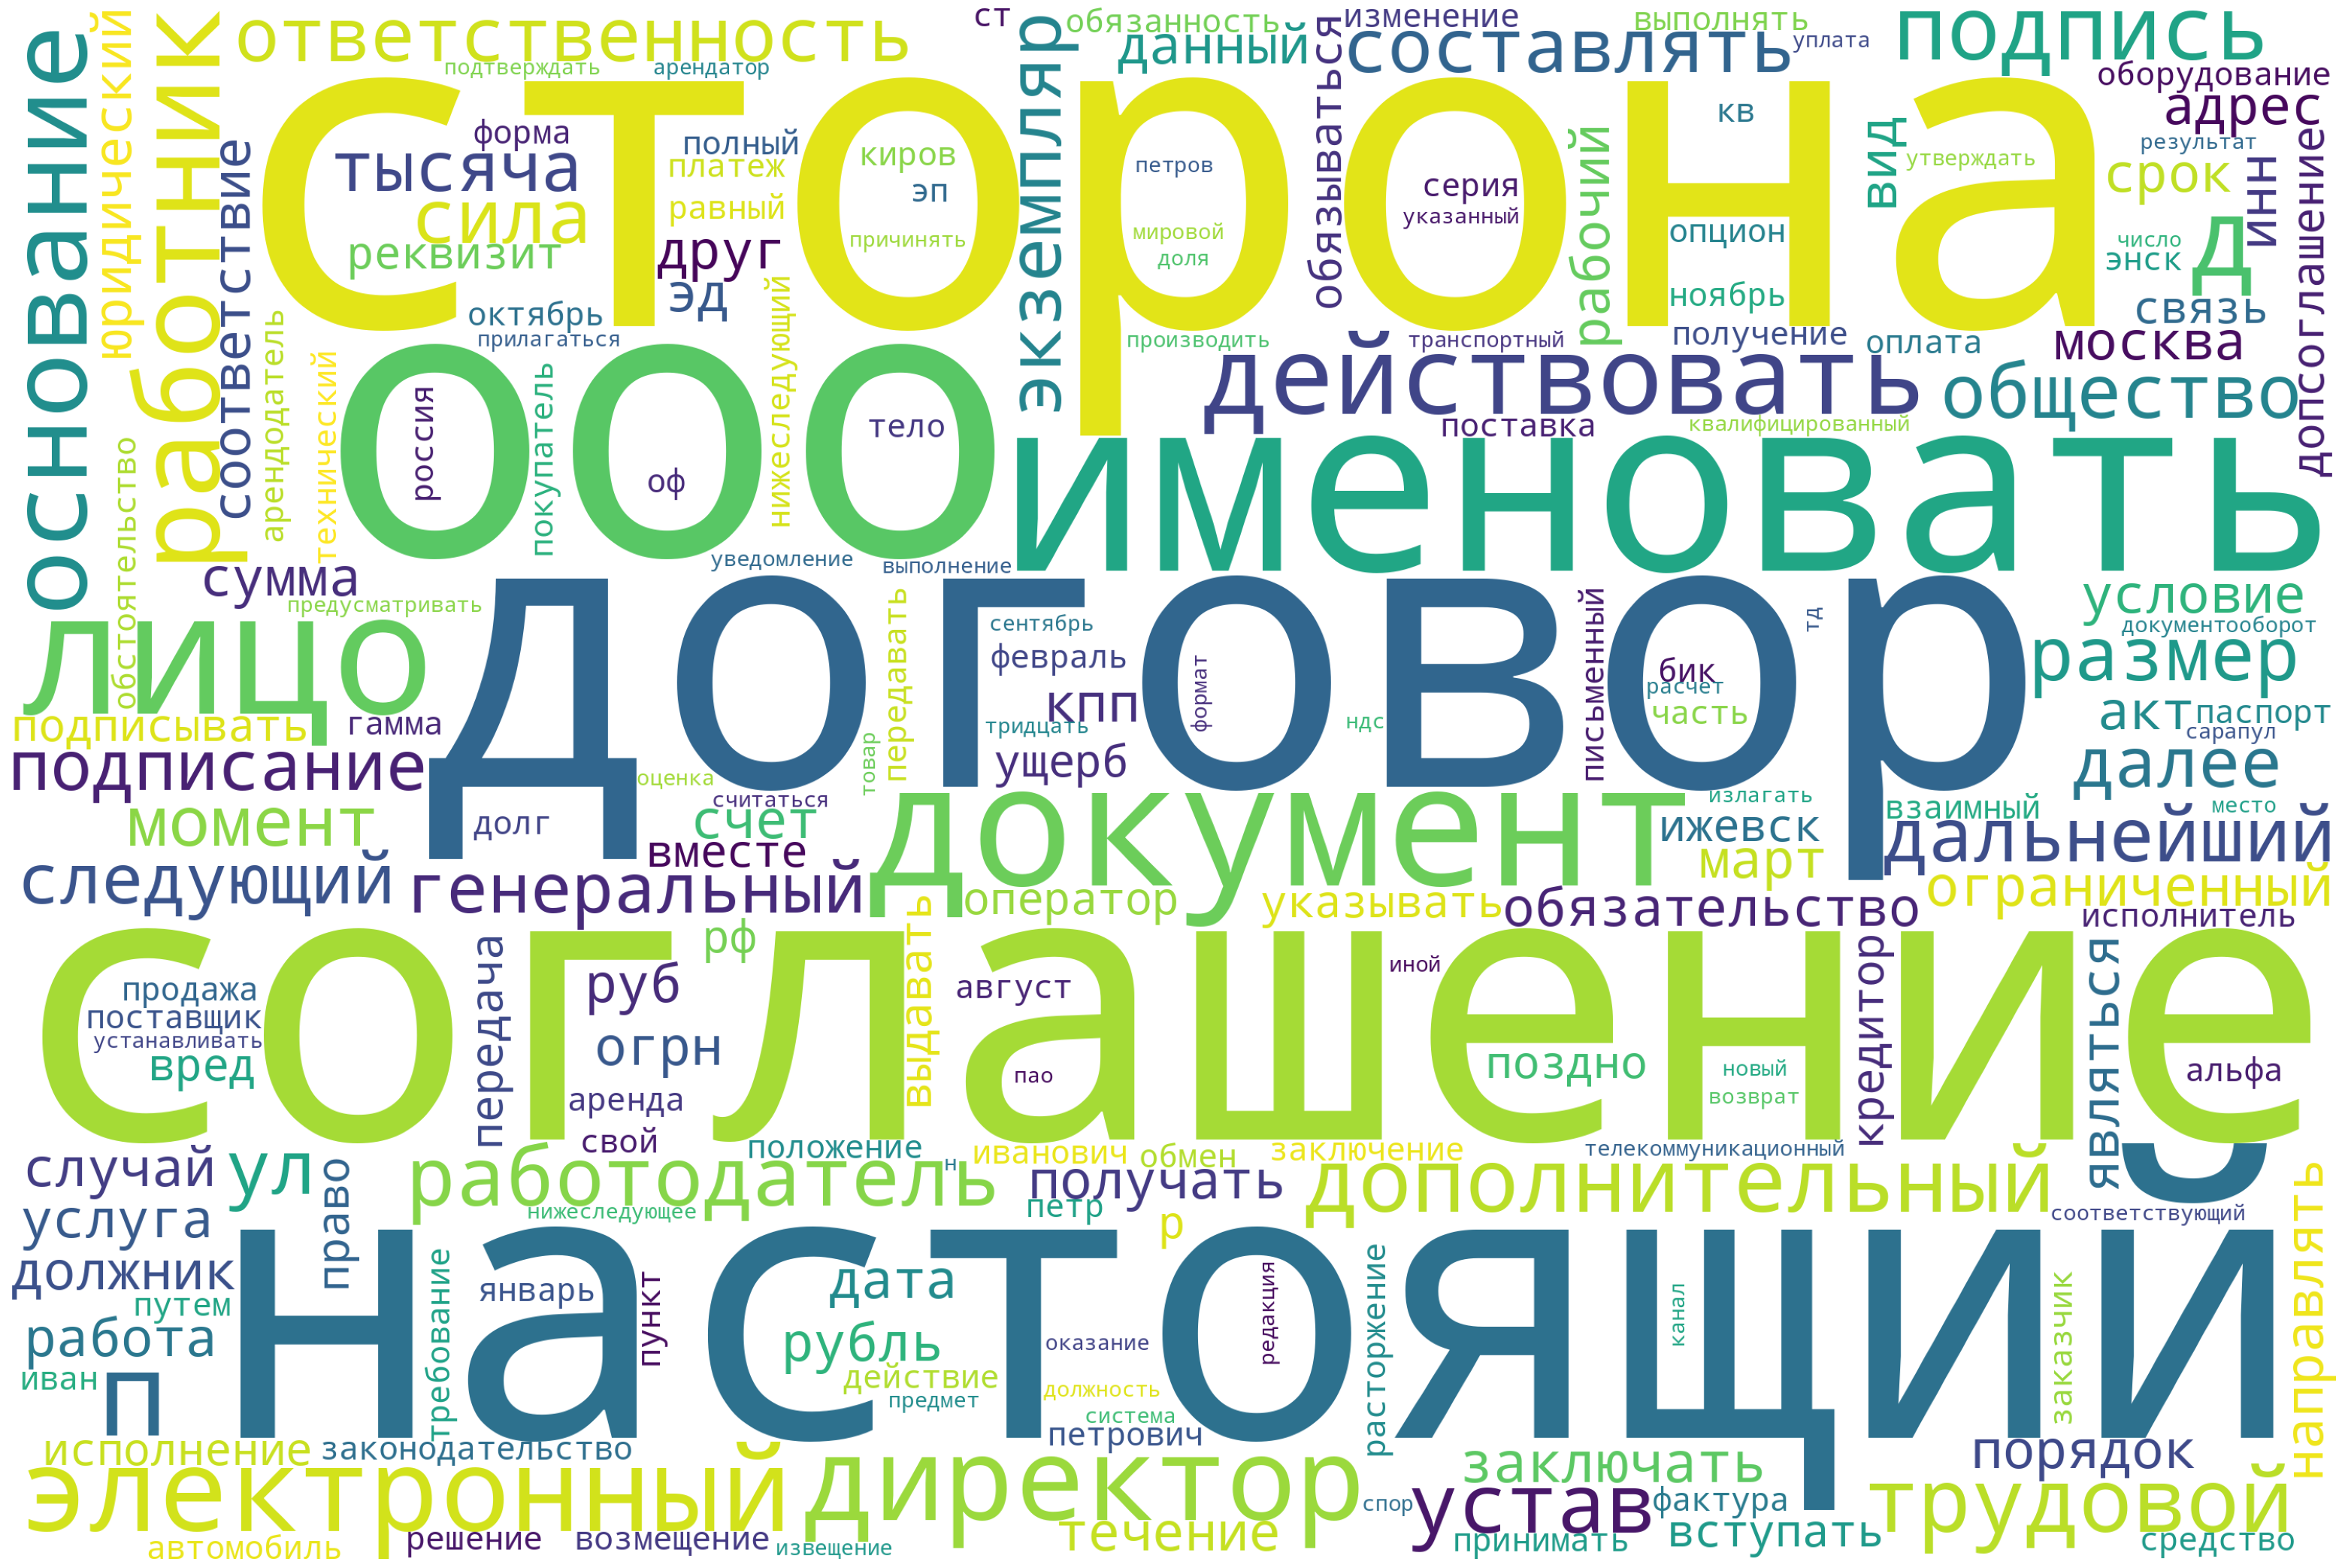

In [81]:
# визуализация сформированного облака слов
plot_cloud(wordcloud_arrangement)

In [15]:
# вывод данных
sample.head()

class                                               text  \
0  arrangement  соглашение     о расторжении трудового договор...   
1  arrangement  соглашение о предоставлении опциона на заключе...   
2  arrangement  соглашение о реструктуризации задолженности   ...   
3  arrangement  дополнительное соглашение  к договору купли пр...   
4  arrangement  соглашение о расторжении договора об оказании ...   

                                      lemm_text_list  \
0  [соглашение, о, расторжение, трудовой, договор...   
1  [соглашение, о, предоставление, опцион, на, за...   
2  [соглашение, о, реструктуризация, задолженност...   
3  [дополнительный, соглашение, к, договор, купля...   
4  [соглашение, о, расторжение, договор, об, оказ...   

                                           lemm_text  
0  соглашение о расторжение трудовой договор от к...  
1  соглашение о предоставление опцион на заключен...  
2  соглашение о реструктуризация задолженность г ...  
3  дополнительный соглашение к договор купля прод...  
4  соглашение о расторжение договор об оказание у...

In [16]:
# проверка наличия пропусков
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           501 non-null    object
 1   text            501 non-null    object
 2   lemm_text_list  501 non-null    object
 3   lemm_text       501 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [17]:
# сохранение в файл
sample.to_csv("sample.csv", index=False)